In [36]:
#importing all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
import numpy as np
from scipy.stats import norm
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split# Import 'train_test_split'
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler


In [37]:
#importing the dataset
df=pd.read_csv("DC_Properties_trimmed.csv")
df.info() #checking the structure of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28900 entries, 0 to 28899
Data columns (total 46 columns):
BATHRM                28900 non-null int64
HF_BATHRM             28900 non-null int64
HEAT                  28900 non-null object
AC                    28900 non-null object
NUM_UNITS             28900 non-null int64
ROOMS                 28900 non-null int64
BEDRM                 28900 non-null int64
AYB                   28900 non-null int64
YR_RMDL               28900 non-null int64
EYB                   28900 non-null int64
STORIES               28900 non-null float64
SALEDATE              28900 non-null object
PRICE                 28900 non-null int64
QUALIFIED             28900 non-null object
SALE_NUM              28900 non-null int64
GBA                   28900 non-null int64
BLDG_NUM              28900 non-null int64
STYLE                 28900 non-null object
STRUCT                28900 non-null object
GRADE                 28900 non-null object
CNDTN                 

In [38]:
#DATA PREPROCESSING
#1.Dealing with missing values
cols=df.columns
# get dimensions
print(df.shape)
print('ColumnName, DataType, MissingValues')
for i in cols:
    print(i, ',', df[i].dtype,',',df[i].isnull().any())

(28900, 46)
ColumnName, DataType, MissingValues
BATHRM , int64 , False
HF_BATHRM , int64 , False
HEAT , object , False
AC , object , False
NUM_UNITS , int64 , False
ROOMS , int64 , False
BEDRM , int64 , False
AYB , int64 , False
YR_RMDL , int64 , False
EYB , int64 , False
STORIES , float64 , False
SALEDATE , object , False
PRICE , int64 , False
QUALIFIED , object , False
SALE_NUM , int64 , False
GBA , int64 , False
BLDG_NUM , int64 , False
STYLE , object , False
STRUCT , object , False
GRADE , object , False
CNDTN , object , False
EXTWALL , object , False
ROOF , object , False
INTWALL , object , False
KITCHENS , int64 , False
FIREPLACES , int64 , False
USECODE , int64 , False
LANDAREA , int64 , False
GIS_LAST_MOD_DTTM , object , False
SOURCE , object , False
FULLADDRESS , object , False
CITY , object , False
STATE , object , False
ZIPCODE , int64 , False
NATIONALGRID , object , False
LATITUDE , float64 , False
LONGITUDE , float64 , False
ASSESSMENT_NBHD , object , False
ASSESSMENT_SUBN

In [39]:
df.isnull().sum()

BATHRM                0
HF_BATHRM             0
HEAT                  0
AC                    0
NUM_UNITS             0
ROOMS                 0
BEDRM                 0
AYB                   0
YR_RMDL               0
EYB                   0
STORIES               0
SALEDATE              0
PRICE                 0
QUALIFIED             0
SALE_NUM              0
GBA                   0
BLDG_NUM              0
STYLE                 0
STRUCT                0
GRADE                 0
CNDTN                 0
EXTWALL               0
ROOF                  0
INTWALL               0
KITCHENS              0
FIREPLACES            0
USECODE               0
LANDAREA              0
GIS_LAST_MOD_DTTM     0
SOURCE                0
FULLADDRESS           0
CITY                  0
STATE                 0
ZIPCODE               0
NATIONALGRID          0
LATITUDE              0
LONGITUDE             0
ASSESSMENT_NBHD       0
ASSESSMENT_SUBNBHD    0
CENSUS_TRACT          0
CENSUS_BLOCK          0
WARD            

In [40]:
#2. checking outliers
fig = px.box(df, y="PRICE",title="Checking for Outliers")
fig.show()

In [41]:
#Removing outliers
def remove_outlier(df, PRICE):
  q1 = df[PRICE].quantile(0.25)
  q3 = df[PRICE].quantile(0.75)
  iqr = q3 - q1
  lower_bound  = q1 - (1.5  * iqr)
  upper_bound = q3 + (1.5 * iqr)
  out_df = df.loc[(df[PRICE] > lower_bound) & (df[PRICE] < upper_bound)]
  return out_df
df = remove_outlier(df,"PRICE")

In [42]:
#showing outliers are removed
#checking if outliers are removed
fig = px.box(df, y="PRICE",title="Checking if OUTLIERS are removed")
fig.show()

In [43]:
#2. Normalization on Numerical variables
# find numeric columns
df1=df.copy()
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# get column names
cols_numeric = df1.select_dtypes(include=numerics).columns.tolist()
# get column indices
cols_numeric_index=[df1.columns.get_loc(col) for col in cols_numeric]
print('Numerical column names:\n',cols_numeric)
print('Numerical column indeices:\n',cols_numeric_index)



# Normalization method using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_numeric]=scaler.fit_transform(df1[cols_numeric])

df1.head()




Numerical column names:
 ['BATHRM', 'HF_BATHRM', 'NUM_UNITS', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'PRICE', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'KITCHENS', 'FIREPLACES', 'USECODE', 'LANDAREA', 'ZIPCODE', 'LATITUDE', 'LONGITUDE', 'CENSUS_TRACT', 'SQUARE', 'X', 'Y']
Numerical column indeices:
 [0, 1, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 24, 25, 26, 27, 33, 35, 36, 39, 42, 43, 44]


,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0.363636,0.000000,Warm Cool,Y,0.333333,0.266667,0.266667,0.587045,0.984985,0.57,...,0.357955,Old City 2,040 D Old City 2,0.372818,004201 2006,Ward 2,0.014005,0.358821,0.583209,NW
3,0.272727,0.090909,Hot Water Rad,Y,0.333333,0.266667,0.266667,0.570850,0.996496,0.57,...,0.361400,Old City 2,040 D Old City 2,0.372818,004201 2005,Ward 2,0.014005,0.358821,0.583209,NW
4,0.272727,0.090909,Warm Cool,Y,0.333333,0.233333,0.200000,0.578947,0.994995,0.52,...,0.362503,Old City 2,040 D Old City 2,0.372818,004201 2005,Ward 2,0.014005,0.358821,0.583209,NW
5,0.272727,0.090909,Warm Cool,Y,0.333333,0.166667,0.200000,0.615385,0.990991,0.52,...,0.363422,Old City 2,040 D Old City 2,0.372818,004201 2005,Ward 2,0.014005,0.358821,0.583209,NW
6,0.272727,0.090909,Warm Cool,Y,0.166667,0.266667,0.200000,0.578947,0.993994,0.52,...,0.362793,Old City 2,040 D Old City 2,0.372818,004201 2005,Ward 2,0.014005,0.358821,0.583209,NW


In [44]:
#3. handling categorical variable. I have label encoded here. But after finding the significant features, I have created dummy variables for the selected categorical variables.
from sklearn.preprocessing import LabelEncoder
cols = df1.select_dtypes(include=['object']).columns
# Process columns and apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df1[c].values)) 
    df1[c] = lbl.transform(list(df1[c].values))

df1.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0.363636,0.000000,12,2,0.333333,0.266667,0.266667,0.587045,0.984985,0.57,...,0.357955,25,91,0.372818,1181,1,0.014005,0.358821,0.583209,1
3,0.272727,0.090909,7,2,0.333333,0.266667,0.266667,0.570850,0.996496,0.57,...,0.361400,25,91,0.372818,1180,1,0.014005,0.358821,0.583209,1
4,0.272727,0.090909,12,2,0.333333,0.233333,0.200000,0.578947,0.994995,0.52,...,0.362503,25,91,0.372818,1180,1,0.014005,0.358821,0.583209,1
5,0.272727,0.090909,12,2,0.333333,0.166667,0.200000,0.615385,0.990991,0.52,...,0.363422,25,91,0.372818,1180,1,0.014005,0.358821,0.583209,1
6,0.272727,0.090909,12,2,0.166667,0.266667,0.200000,0.578947,0.993994,0.52,...,0.362793,25,91,0.372818,1180,1,0.014005,0.358821,0.583209,1


,PRICE,EYB,GRADE,FIREPLACES,BATHRM,GBA,CNDTN,LATITUDE,Y,HF_BATHRM,BEDRM
0,0.704180,0.57,9,0.5,0.363636,0.209137,3,0.583221,0.583209,0.000000,0.266667
3,0.675241,0.57,9,0.1,0.272727,0.197172,0,0.587689,0.583209,0.090909,0.266667
4,0.919614,0.52,0,0.1,0.272727,0.106892,5,0.585292,0.583209,0.090909,0.200000
5,0.852090,0.52,0,0.1,0.272727,0.225947,5,0.585419,0.583209,0.090909,0.200000
6,0.797428,0.52,0,0.0,0.272727,0.124098,5,0.585296,0.583209,0.090909,0.200000


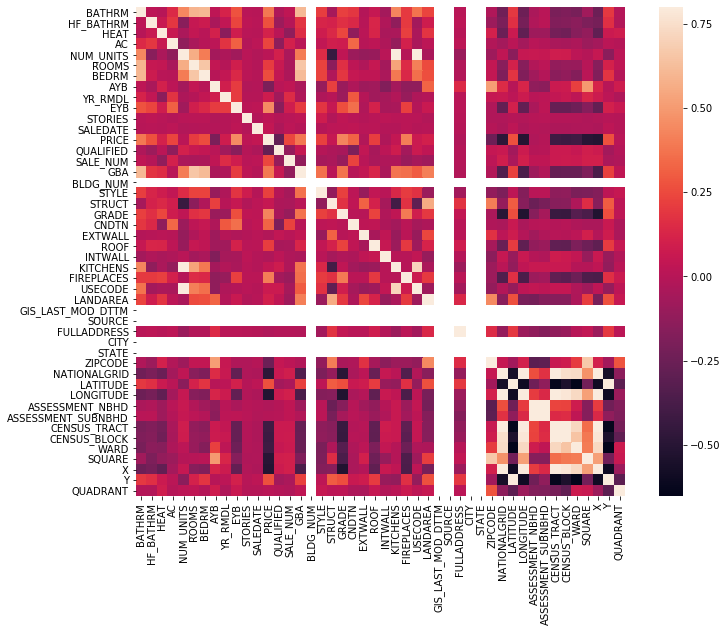

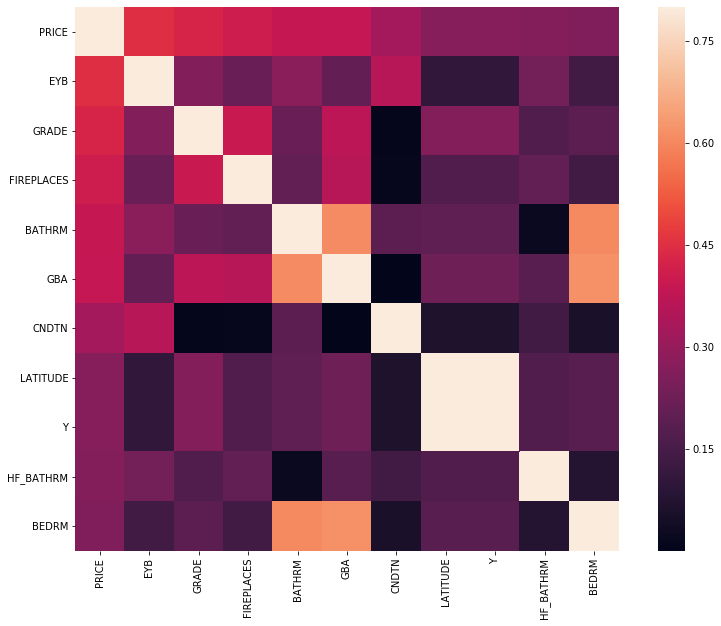

In [45]:
corrmat = df1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'PRICE')['PRICE'].index
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(df1[cols].corr(), vmax=.8, square=True);
df1[cols].head()

In [46]:
#creating variables with the selected variables
df_clean= df1[['PRICE', 'GBA', 'FIREPLACES','EYB','BATHRM','LATITUDE','BEDRM','Y','GRADE','HF_BATHRM','CNDTN']]
df_clean.head()
df_clean['CNDTN'].value_counts()



3    16372
0     7820
5     3194
2       77
1       32
4       12
Name: CNDTN, dtype: int64

In [47]:
#Baseline model
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
df_fin=df_clean.copy()
X = df_fin.drop(columns='PRICE')
y = df_fin['PRICE']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


(19254, 10) (19254,)
(8253, 10) (8253,)


In [48]:
dummy_median = DummyRegressor(strategy='mean')
dummy_regressor = dummy_median.fit(X_train,y_train)
dummy_predicts = dummy_regressor.predict(X_test)
print("Model Accuracy:", dummy_regressor.score(X_test,y_test)*100)
print('The average error margin for each prediction is $',mean_absolute_error(y_test,dummy_predicts))


Model Accuracy: -8.350972446891092e-06
The average error margin for each prediction is $ 0.17244815923972334


In [49]:
#Ridge model
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 26, 1)))}
lasso = linear_model.Lasso()
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2')
gridlasso.fit(X_train, y_train)
print("lasso best parameters:", gridlasso.best_params_)
print("Lasso score:", gridlasso.score(X_test, y_test))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test))) 


NameError: name 'linear_model' is not defined

In [50]:
#performing linear regression
from sklearn import linear_model
regressor = linear_model.LinearRegression() 
from sklearn.metrics import mean_squared_error
regressor.fit(X_train, y_train) #training the algorithm

print (regressor.coef_) #f(x)=mx+b=y

y_predict=regressor.predict(X_test)
print(y_predict)

print(y_test)


#check MSE
print(mean_squared_error(y_test,y_predict))
print(r2_score(y_test , y_predict)) 

[ 0.26093638  0.48750964  0.41188414  0.38919892  0.23387041 -0.05157234
 -0.1293524   0.01318689  0.38977922  0.02624745]
[0.2293898  0.82178836 0.39036428 ... 0.26614772 0.41712367 0.49145204]
27359    0.184565
1542     0.871383
8719     0.786173
3199     0.443086
19481    0.234726
3292     0.395498
28397    0.258360
3657     0.647910
24721    0.209003
6551     0.095578
22153    0.156270
13826    0.308681
23885    0.131768
21391    0.260450
1791     0.102250
9869     0.366559
6129     0.500386
16266    0.192926
10330    0.675241
7596     0.043729
14310    0.068810
9817     0.510932
12927    0.713826
19885    0.266237
302      0.768489
9389     0.561093
10122    0.942122
25659    0.053054
21157    0.344694
634      0.605788
           ...   
1323     0.392283
2922     0.428939
25755    0.215434
17791    0.102893
10969    0.691318
9604     0.819132
23604    0.237942
12666    0.617363
14603    0.411575
7599     0.328938
20554    0.192926
17830    0.366559
3863     0.430868
27087    0.12

In [51]:
y_pred = regressor.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))

print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))


print(r2_score(y_pred , y_test)) 



Mean absolute error: 0.12
Residual sum of squares (MSE): 0.03
-0.18541202653155286


In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR


models = [LinearRegression(),SVR(kernel='rbf', C=1e3, gamma=0.1),RandomForestRegressor(n_estimators=200,criterion='mse',max_depth=20,random_state=100),DecisionTreeRegressor(criterion='mse',max_depth=11,random_state=100),GradientBoostingRegressor(n_estimators=200,max_depth=12)]
learning_mods = pd.DataFrame()
temp = {}

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
score on training 0.45623887575630695
r2 score 0.44080319695037296
SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
score on training 0.5697597036425257
r2 score 0.5166507187832904
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=100, verbose=0,
                      warm_start=False)
score on training 0.916231299213003
r2 score 0.5365139683487965
DecisionTreeRegressor(criterion='mse', max_depth=11, max_features=None,
                      max_leaf_nodes=None, 

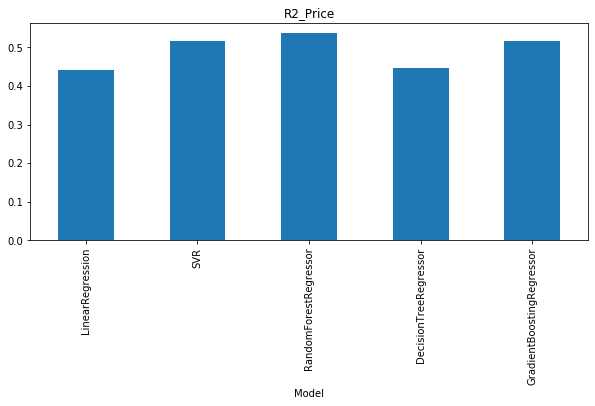

In [53]:
#run through models
for model in models:
    print(model)
    m = str(model)
    temp['Model'] = m[:m.index('(')]
    model.fit(X_train, y_train)
    temp['R2_Price'] = r2_score(y_test, model.predict(X_test))
    print('score on training',model.score(X_train, y_train))
    print('r2 score',r2_score(y_test, model.predict(X_test)))
    learning_mods = learning_mods.append([temp])
learning_mods.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
learning_mods.R2_Price.plot(ax=axes, kind='bar', title='R2_Price')
plt.show()

In [54]:
learning_mods.head()

,R2_Price
Model,
LinearRegression,0.440803
SVR,0.516651
RandomForestRegressor,0.536514
DecisionTreeRegressor,0.447127
GradientBoostingRegressor,0.515859


In [55]:
#performing neural network
df2= df[['PRICE', 'GBA', 'FIREPLACES','EYB','BATHRM','LATITUDE','BEDRM','Y','GRADE','HF_BATHRM','CNDTN']]
df2.head()

#converting categorcal variables on GRADE and STYLE
from sklearn.preprocessing import LabelEncoder
cols = df2.select_dtypes(include=['object']).columns
# Process columns and apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df2[c].values)) 
    df2[c] = lbl.transform(list(df2[c].values))

df2.head()




C:\Users\priya\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,PRICE,GBA,FIREPLACES,EYB,BATHRM,LATITUDE,BEDRM,Y,GRADE,HF_BATHRM,CNDTN
0,1095000,2522,5,1972,4,38.914680,4,38.914881,9,0,3
3,1050000,2401,1,1972,3,38.915408,4,38.914881,9,1,0
4,1430000,1488,1,1967,3,38.915017,3,38.914881,0,1,5
5,1325000,2692,1,1967,3,38.915038,3,38.914881,0,1,5
6,1240000,1662,0,1967,3,38.915018,3,38.914881,0,1,5


In [56]:
#Splitting the train and test data
X_nn=df2.drop(columns=['PRICE'])
Y_nn=df2[['PRICE']]

In [57]:
model= keras.Sequential()

model.add(keras.layers.Dense(10,activation='relu',input_shape=(10,)))
model.add(keras.layers.Dense(10,activation='relu'))
model.add(keras.layers.Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')



In [58]:
model.fit(X_nn,Y_nn,epochs=30,callbacks=[keras.callbacks.EarlyStopping(patience=5)])


Train on 27507 samples
Epoch 1/30
27507/27507 [==============================] - 2s 71us/sample - loss: 355626242401.9533
Epoch 2/30
27507/27507 [==============================] - 1s 47us/sample - loss: 108965076423.1732
Epoch 3/30
27507/27507 [==============================] - 1s 54us/sample - loss: 91970723929.3445
Epoch 4/30
27507/27507 [==============================] - 2s 63us/sample - loss: 91781950884.4777
Epoch 5/30
27507/27507 [==============================] - 2s 69us/sample - loss: 91717069024.4781
Epoch 6/30
27507/27507 [==============================] - 2s 63us/sample - loss: 91591824723.2486
Epoch 7/30
27507/27507 [==============================] - 2s 63us/sample - loss: 91485340801.1401
Epoch 8/30
27507/27507 [==============================] - 2s 66us/sample - loss: 91373241901.3982
Epoch 9/30
27507/27507 [==============================] - 2s 59us/sample - loss: 91289802115.4947
Epoch 10/30
27507/27507 [==============================] - 1s 53us/sample - loss: 91202649472

In [59]:
df2.iloc[0]

PRICE         1.095000e+06
GBA           2.522000e+03
FIREPLACES    5.000000e+00
EYB           1.972000e+03
BATHRM        4.000000e+00
LATITUDE      3.891468e+01
BEDRM         4.000000e+00
Y             3.891488e+01
GRADE         9.000000e+00
HF_BATHRM     0.000000e+00
CNDTN         3.000000e+00
Name: 0, dtype: float64

In [60]:
test_data=np.array([2522,5,1972,4,38.914680,4,38.914881,9,0,3])
print("Predicted Price of the first row attributes",model.predict(test_data.reshape(1,10),batch_size=1))
print("Price of the original first row",df2['PRICE'].iloc[0])

Predicted Price of the first row attributes [[757794.56]]
Price of the original first row 1095000
